In [1]:
import os

def list_files_in_folder(folder_path):
    try:
        # Get a list of files in the specified folder
        files = os.listdir(folder_path)
        
        return files
            
    except FileNotFoundError:
        print("Folder not found: {}".format(folder_path))

folder_path = './data/raw'
files = list_files_in_folder(folder_path)
files

['tip_amount_counts.csv',
 'trip_distance_counts.csv',
 'delta_min_counts.csv',
 'PULocationID_counts.csv',
 'DOLocationID_counts.csv']

/tmp/ipykernel_17397/399742546.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.3}%' for x in plt.gca().get_yticks()])


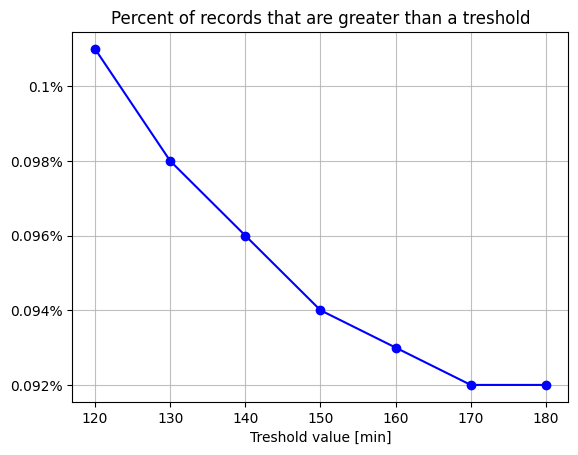

/tmp/ipykernel_17397/399742546.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x}%' for x in plt.gca().get_yticks()])


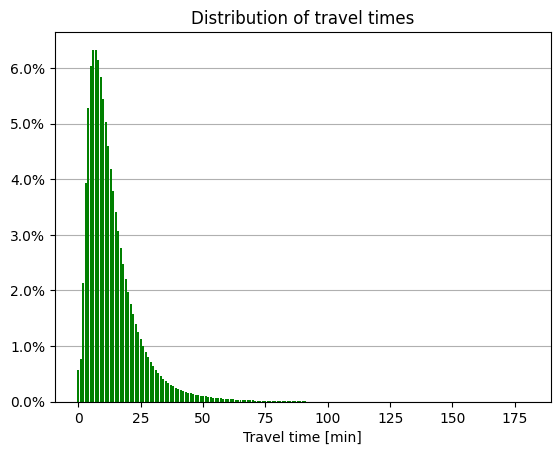

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

FOLDER_PATH = './data/raw/'
F_NAME = "delta_min_counts.csv"

# Read df
df = pd.read_csv(FOLDER_PATH + F_NAME)

# Count percent of records that are greater than a treshold value
tersholds = list(range(120, 181, 10))
total = df["count"].sum()

percents = []
for tershold in tersholds:
    s = df[df.delta_time_min > tershold]["count"].sum()
    percents.append(round(s/total*100,3))

s = df[df.delta_time_min > 150]["count"].sum()

# Plot results
plt.plot(tersholds, percents, color="b", linestyle='-', marker="o")
plt.grid(True, alpha=0.8)

plt.title("Percent of records that are greater than a treshold")
plt.xlabel("Treshold value [min]")
plt.gca().set_yticklabels([f'{x:.3}%' for x in plt.gca().get_yticks()]) 
# plt.savefig("./figures/cleaning/delta_time_outliers.png")

plt.show()

# Filter df
df_filter = df.query('delta_time_min >= 0 and delta_time_min <= 180')

# Plot distribution for 99.9% of records
plt.bar(df_filter["delta_time_min"], df_filter["count"]/total*100, color="g", zorder=2)

plt.title("Distribution of travel times")
plt.xlabel("Travel time [min]")
plt.gca().set_yticklabels([f'{x}%' for x in plt.gca().get_yticks()]) 
plt.grid(True, axis='y', zorder=1)

# plt.savefig("./figures/cleaning/delta_time_distribution.png")
plt.show()


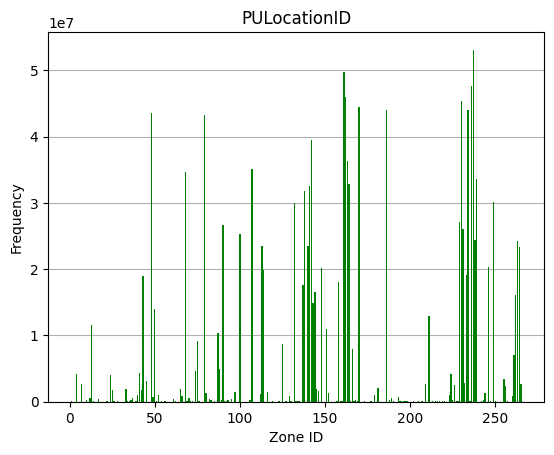

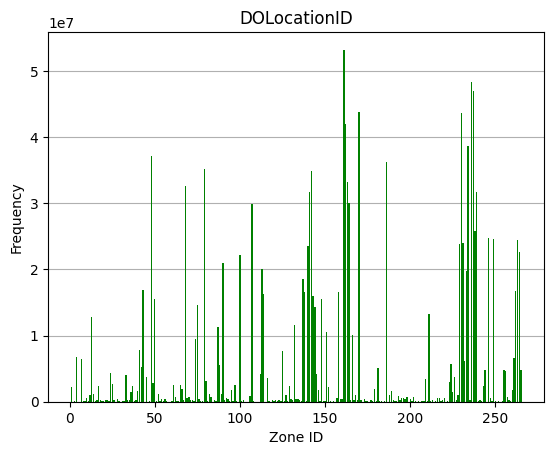

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
FOLDER_PATH = './data/raw/'

f_names = ["PULocationID_counts.csv", "DOLocationID_counts.csv"]

for f_name in f_names:
    df = pd.read_csv(FOLDER_PATH + f_name)
    label = df.columns[0]

    plt.bar(df[label], df["count"], color="g", zorder=2)
    plt.grid(True, axis='y', zorder=1)
    
    plt.xlabel("Zone ID")
    plt.ylabel("Frequency")
    plt.title(label)

    # plt.savefig(f"./figures/cleaning/{label}_distribution.pdf")
    plt.show()

/tmp/ipykernel_17397/4174039709.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.2}%' for x in plt.gca().get_yticks()])


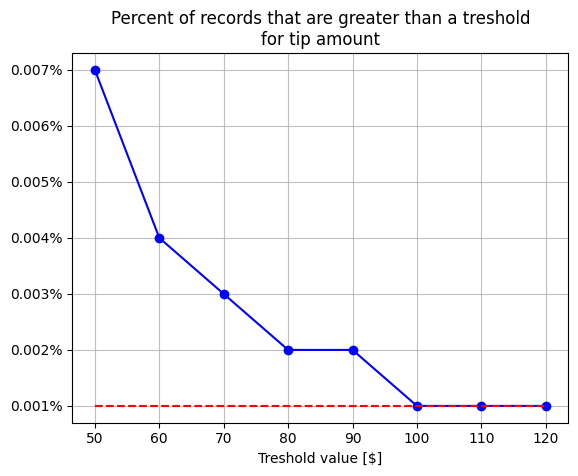

/tmp/ipykernel_17397/4174039709.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x}%' for x in plt.gca().get_yticks()])


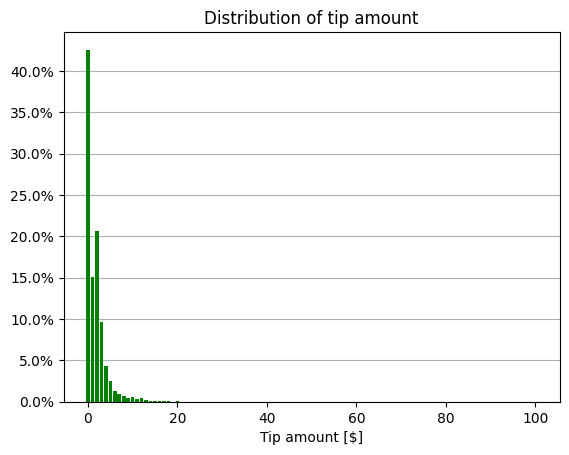

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

FOLDER_PATH = './data/raw/'
F_NAME = "tip_amount_counts.csv"

# Read df
df = pd.read_csv(FOLDER_PATH + F_NAME)

# Count percent of records that are greater than a treshold value
tersholds = list(range(50, 130, 10))
total = df["count"].sum()

percents = []
for tershold in tersholds:
    s = df[df.tip_amount > tershold]["count"].sum()
    percents.append(round(s/total*100,3))

# Plot results
plt.plot(tersholds, percents, color="b", linestyle='-', marker="o")
plt.plot(tersholds, [0.001 for i in tersholds], color="r", linestyle="dashed")
plt.grid(True, alpha=0.8)

plt.title("Percent of records that are greater than a treshold\nfor tip amount")
plt.xlabel("Treshold value [$]")
plt.gca().set_yticklabels([f'{x:.2}%' for x in plt.gca().get_yticks()]) 

# plt.savefig("./figures/cleaning/tip_amount_outliers.pdf")
plt.show()

# Filter df
df_filter = df.query('tip_amount >= 0 and tip_amount <= 100')

# Plot distribution for 99.9% of records
plt.bar(df_filter["tip_amount"], df_filter["count"]/total*100, color="g", zorder=2)
plt.grid(True, axis='y', zorder=1)

plt.title("Distribution of tip amount")
plt.xlabel("Tip amount [$]")
plt.gca().set_yticklabels([f'{x}%' for x in plt.gca().get_yticks()]) 

# plt.savefig("./figures/cleaning/tip_amount_distribution.pdf")
plt.show()

0.001


/tmp/ipykernel_17397/1447904142.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.3}%' for x in plt.gca().get_yticks()])


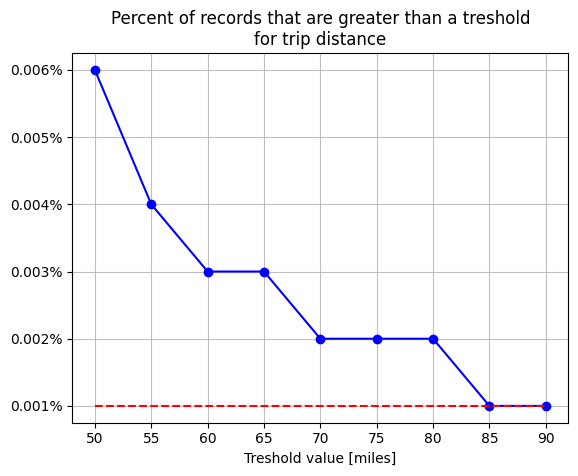

/tmp/ipykernel_17397/1447904142.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x}%' for x in plt.gca().get_yticks()])


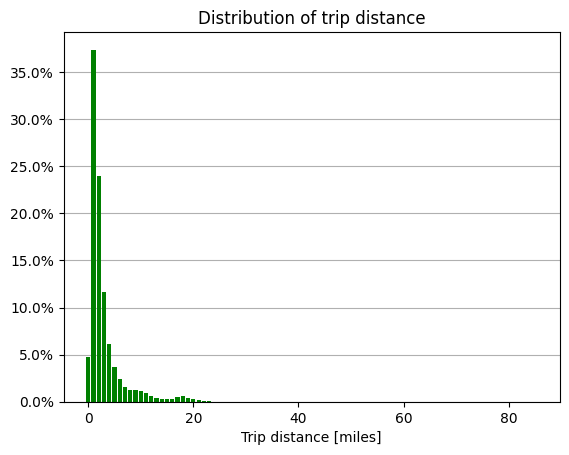

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

FOLDER_PATH = './data/raw/'
F_NAME = "trip_distance_counts.csv"

# Read df
df = pd.read_csv(FOLDER_PATH + F_NAME)

# Count percent of records that are greater than a treshold value
tersholds = list(range(50, 91, 5))
total = df["count"].sum()

percents = []
for tershold in tersholds:
    s = df[df.trip_distance > tershold]["count"].sum()
    percents.append(round(s/total*100,3))

s = df[df.trip_distance > 85]["count"].sum()
print(round(s/total*100,3))

# Plot results
plt.plot(tersholds, percents, color="b", linestyle='-', marker="o")
plt.plot(tersholds, [0.001 for i in tersholds], color="r", linestyle="dashed")
plt.grid(True, alpha=0.8)

plt.title("Percent of records that are greater than a treshold\nfor trip distance")
plt.xlabel("Treshold value [miles]")
plt.gca().set_yticklabels([f'{x:.3}%' for x in plt.gca().get_yticks()]) 

# plt.savefig("./figures/cleaning/trip_distance_outliers.pdf")
plt.show()

# Filter df
df_filter = df.query('trip_distance >= 0 and trip_distance <= 85')

# Plot distribution for 99.9% of records
plt.bar(df_filter["trip_distance"], df_filter["count"]/total*100, color="g", zorder=2)
plt.grid(True, axis='y', zorder=1)

plt.title("Distribution of trip distance")
plt.xlabel("Trip distance [miles]")
plt.gca().set_yticklabels([f'{x}%' for x in plt.gca().get_yticks()])

#plt.savefig("./figures/cleaning/trip_distance_distribution.pdf")
plt.show()